In [ ]:
!pip install d2l==1.0.3

## 7.1 From Fully Connected Layers to Convolutions

Convolutional neural networks (CNNs) are one creative way that machine learning has embraced for exploiting some of know structure in natural images.

### 7.1.1 Invariance

- In object detection and segmentation tasks, the appearance of an object remains the same regqrdless of its location in an image.
- To detect objects, algorithms can scan the image, evaluating each region or "patch" and assigning a score that represents the likelihood of the object being in that region. Many detection and segmentation algorithms use this approach to identify objects.
- CNN systematize this idea of spatial invariance, exploiting it to learn useful representations with fewer parameters.

- the earliest layer에서 네트워크는 이미지의 어디에 나타나든 동일한 패치에 비슷하게 반응해야 함.(*Translation invariance*)
- the earliest layer : 먼 지역의 이미지 내용과 관계없이 로컬 지역에 초점을 맞춰야 함. (*Locality principle*) local expression 집계하여 전체 이미지 수준에서 예측 가능
- 더 깊은 layer 통해 이미지의 더 먼 거리의 특징 포착 가능

### 7.1.2 Constraining the MLP (*Multi Layer Perceptron*)

먼저 2차원 이미지 가진 MLP 고려

input X와 matrix(코드에서는 2차원 tensor)로 표현되는 X에 대한 hidden representation(은닉표현)인 H (X와 H는 같은 공간적 구조를 가짐)

- $X_{ij}$ = pixel location of input image
- $H_{ij}$ = pixel location of hidden representation
- $U_{ij}$ = bias term

hidden unit 각각이 모든 input pixel로부터 입력을 받도록 하기 위해서 이전 MLP에서 사용한 weight matrix를 대신하여 4차원 wight tensor 사용

$$\mathbf{H}_{i,j} = \mathbf{U}_{i,j} + \sum_{k} \sum_{l} \mathbf{W}_{i,j,k,l} \mathbf{X}_{k,l}$$
$$
= \mathbf{U}_{i,j} + \sum_{a} \sum_{b} \mathbf{V}_{i,j,a,b} \mathbf{X}_{i+a,j+b}$$


W에서 V로의 전환은 형식적인 차이에 불과

두 4차 tensor의 계수 간에는 일대일 대응이 존재
$$k = i + a, l = j + b$$
$$ V_{i,j,a,b} = W_{i, j, i + a, j + b} $$
a와 b는 이미지 전체를 덮는 양수 및 음수의 offset

주어진 위치 (i, j)에서 은닉표현 $H_{ij}$값을 계산하기 위해 픽셀 X 주변의 값을 a와 b에 대해 합산 -> $V_{ij}$로 가중 처리하여 계산

이때 단일 계층에서 이 parameterfmf tkdydgkdu 1000 X 1000 크기의 이미지를 1000 X 1000의 은닉 표현으로 매핑하는 데 필요한 매개변수는 $10^{12}$로 컴퓨터의 처리 능력을 벗어남

#### 7.1.2.1 Translation Invariance

input X의 이동이 은닉 표현 H와 동일한 이동으로 이어저야 한다는 원칙

V와 U가 위치 (i,j)에 의존하지 않을 때 가능하며, V는 $V_{a,b,}$로, U는 상수 $u$로 단순화

$$\mathbf{H}_{i,j} = u + \sum_{a} \sum_{b} \mathbf{V}_{a,b} \mathbf{X}_{i+a, j+b}$$

Convolution
실제로 위치 (i+a, j+b) 근처 피겔에 대해 $V_{ab)$ 계수 적용하여 $H_{ij}$값 계산 (더 적은 매개변수)

#### 7.1.2.2 Locality

input data의 특정 위치에서 무슨 일이 일어나는지 알기 위해 너무 멀리 떨어진 위치를 고려할 필요 X

i, j 위치에서 일어나는 일은 근처에서 일어난 현상에 크게 의존 (말리 떨어진 정보는 무시 가능)

 $ |a| > \Delta $ 또는 $|b| > \Delta$인 경우 $[V]_{a,b} = 0$로 설정

$$[H]_{i,j} = u + \sum_{a=-\Delta}^{\Delta} \sum_{b=-\Delta}^{\Delta} [V]_{a,b} [X]_{i+a,j+b}$$

위치 (i,j)의 필터 출력 계산 시 인접한 값들만 고려

이 방법을 통해 400만개의 매개변수를 $4\Delta^2$로 줄일 수 있음 (Convolution의 본질적 특징)

Inductive bias 추가 (매개변수의 감소) -> 모델이 훈련되지 않은 데이터에 대해서도 일반화 가능




### 7.1.3 Convolution

- 수학적 정의
$$(f * g)(x) = \int f(z)g(x - z) dz$$

- Discrete convolution
  
  연속적 함수 대신 이산적 개체를 다룰 때, 적분이 합으로 변화
  $$(f * g)(i) = \sum_a f(a) g(i - a)$$

- Convolution of 2-dimension tensor

  (i + a, j + b) 대신 (i - a, j - b)를 사용

  $$(f * g)(i, j) = \sum_a \sum_b f(a, b) g(i - a, j - b)$$

### 7.1.4 Channels

Convolutional layer = 주어진 크기의 창을 선택하고 필터에 따라 weight 가중

Image = 2차원 객체가 아니라 높이, 너비, 채널로 특징지어진느 3차원 tensor (1024 X 1024 X 3)

은닉 표현 역시 3차원 tensor로 변환 필요
(각 공간 위치에 단일한 은닉 표현 할당하는 대신, 벡터 형태의 은닉 표현 할당)

이러한 은닉 표현 = 여러 개의 2차원 그리드로 구성 (Channel or feature map)

(ex) 어떤 채널은 edge 인식, 다른 채널은 texture 인식


다중 채널을 다루기 위해 4번째 축을 추가해 input과 hidden expression을 모두 다뤄야 하며, 따라서 input tensor가 4차원으로 확장 (다채널 처리하는 Convolution layer 정의)

### 7.1.6 Exercises

4. Do you think that convolutional layers might also be applicable for text data? Which problems might you encounter with language?

A. 텍스트 데이터를 다룰 때, 단어를 벡터 형태로 표현하고 이 벡터들을 입력으로 받아 특정 패턴 학습 가능

CNN = 텍스트 내에서 지역적 패턴을 찾는 데 유용
(문장의 일부분에서 의미 있는 단어 조합 학습)

하지만 텍스트 데이터는 단어 순서가 중요한데, CNN은 지역적 패턴을 학습하는 데 초점을 두므로 전체 문장 순서 혹은 의미가 잘 반영되지 않을 수 있음.

## 7.2 Convolutions for Images

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

### 7.2.1 The Cross-Correlation Operation

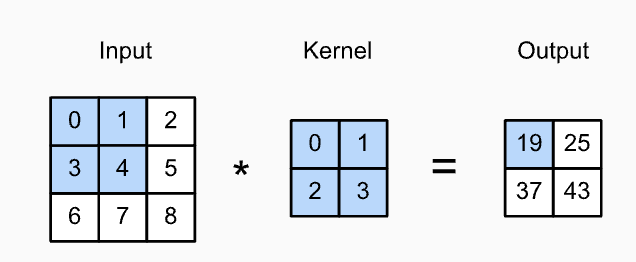

input = 높이가 3이고 너비가 3인 2차원 tensor

Two-dimensional cross-correlation operation (2차원 교차 상관 연산)

0 x 0 + 1 x 1 + 3 x 2 + 4 x 3 = 19

2차원 교차 상관 연산에서 우리는 input tensor의 왼쪽 위 모서리 window부터 시작하여 왼 -> 오, 위 -> 아래로 슬라이드

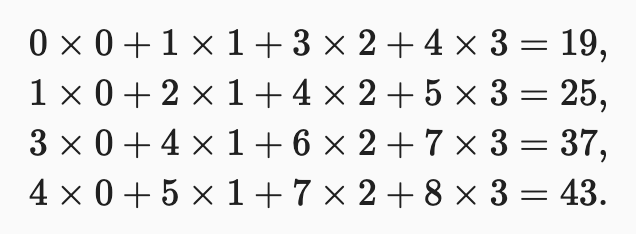

각 축을 따라 출력 크기가 입력 크기보다 약간 작음 (kernel의 너비와 높이가 입력 크기보다 크기 때문)

kernel이 이미지 내에 완전히 들어맞는 위치에 대해서만 적절한 교차 상관 관계 계산 가능 ( 이미지 전체에서 convolutional kernel을 이동할 충분한 공간이 필요하기 때문 / 출력 크기 = 입력 크기에 의해 제공)
 $$(n_b - k_h + 1) * (n_w - k_w + 1)$$


In [ ]:
def corr2d(X, K):
    """Compute 2D cross-correlation."""
    h, w = K.shape
    Y = torch.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (X[i:i + h, j:j + w] * K).sum()
    return Y

그림의 input tensor X와 kernel tensor를 구성하여 2차원 교차 상관 연산 출력 검증 가능

In [ ]:
def corr2d(X, K):
    """Compute 2D cross-correlation."""
    h, w = K.shape
    Y = torch.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (X[i:i + h, j:j + w] * K).sum()
    return Y

### 7.2.2 Convolutional Layers

input과 kernel을 cross validation하고, scalar bias를 추가하여 output 생성

Convolution 계층을 기반으로 모델 학습 시 일반적으로 fully connected layer와 마찬가지로 kernel 무작위 초기화

In [ ]:
class Conv2D(nn.Module):
    def __init__(self, kernel_size):
        super().__init__()
        self.weight = nn.Parameter(torch.rand(kernel_size))
        self.bias = nn.Parameter(torch.zeros(1))

    def forward(self, x):
        return corr2d(x, self.weight) + self.bias

- 1 by 1 Convolution

  kernel은 각 픽셀의 채널별 정보를 독립적으로 처리

  공간적인 관계에 영향을 미치지 않고, 대신 각 픽셀의 채널 간에 연산을 수행

  주로 채널 간의 상호작용 학습 or 채널 수를 줄이거나 늘리는 데 사용 (Dimensionality reduction or 연산 비용 절감을 위해 사용)

- n by n Convolution

  n = kernel의 높이와 너비

  kernel은 주어진 영역 내에서 주변 픽셀들과의 관계를 학습하는 데 사용.

  일반적으로 공간적 정보를 더 잘 포착하기 위해 3 by 3 or 5 by 5 등의 커널 많이 사용

  kernel이 커질수록 넓은 범위 정보 학습이 가능하지만, 연산 비용이 증가한다는 단점 존재

### 7.2.3 Object Edge Detection in Images

픽셀 변경 위치 찾아 이미지에서 객체의 edge 감지

In [ ]:
X = torch.ones((6, 8))
X[:, 2:6] = 0
X

tensor([[1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.]])

높이 = 1, 너비 = 2인 kernel 구성

k입력, cross-correlation operation 수행 시 가로로 인접한 요소가 같으면 output = 0, 그렇지 않으면 output = 0이 아닌 값을 반환하는 방식



In [ ]:
K = torch.tensor([[1.0, -1.0]])

흰색에서 검은색으로의 경계에서는 -1을 감지하고, 검은색에서 흰색으로의 경계에서는 1을 감지

그 외의 모든 출력값은 0이 됨

In [ ]:
Y = corr2d(X, K)
Y

tensor([[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.]])

transpose된 이미지에 kernel 적용

In [ ]:
corr2d(X.t(), K)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

### 7.2.4 Learning a kernel

- Convolutional layer 구성하고 random tensor로 초기화

- 각 epoch에서 제곱 오차를 사용하여 convolutional layer의 output과 비교

- gradient 계산하여 kernel을 update

- 2차원 convolutional layer에 대한 내장 class 사용, bias 무시

In [ ]:
# Construct a two-dimensional convolutional layer with 1 output channel and a
# kernel of shape (1, 2). For the sake of simplicity, we ignore the bias here
conv2d = nn.LazyConv2d(1, kernel_size=(1, 2), bias=False)

# The two-dimensional convolutional layer uses four-dimensional input and
# output in the format of (example, channel, height, width), where the batch
# size (number of examples in the batch) and the number of channels are both 1
X = X.reshape((1, 1, 6, 8))
Y = Y.reshape((1, 1, 6, 7))
lr = 3e-2  # Learning rate

for i in range(10):
    Y_hat = conv2d(X)
    l = (Y_hat - Y) ** 2
    conv2d.zero_grad()
    l.sum().backward()
    # Update the kernel
    conv2d.weight.data[:] -= lr * conv2d.weight.grad
    if (i + 1) % 2 == 0:
        print(f'epoch {i + 1}, loss {l.sum():.3f}')

epoch 2, loss 12.351
epoch 4, loss 2.342
epoch 6, loss 0.503
epoch 8, loss 0.130
epoch 10, loss 0.040


10번의 epoch 후 오류가 작은 값으로 떨어졌음을 주목

In [ ]:
conv2d.weight.data.reshape((1, 2))

tensor([[ 1.0009, -0.9643]])

### 7.2.5 Cross-Correlation and Convolution

딥러닝에서는 kernel이 데이터로부터 학습되므로, convolution layer가 엄격한 convolution 연산이나 cross-correlation operation을 수행하더라도 convolution layer의 output은 영향을 받지 않음



### 7.2.6 Feature map and Receptive Field

- Feature map
  convolutional output은 feature map이라고도 함 (후속 계층에 대한 공간 차원의 학습된 표현으로 간주될 수 있기 때문)

- Receptive field
  특정 layer의 요소가 계산되는 데 영향을 미치는 input instance의 집합 (실제 입력크기보다 클 수 잇음 / 네트워크가 깊어짐에 따라 증가)

- ex
  2 by 2 convolutional kernel이 있는 경우, 특정 output instance의 receptive field는 input instance의 특정 부분으로 정의

### 7.2.8 Exercises

4. How do you represent a cross-correlation operation as a matrix multiplication by changing the input and kernel tensors?

- input tensor transformation
  입력 이미지 X를 행렬 형태로 변환

- kernel tensor transformation
  kernel K도 행렬 형태로 변환

- matrix multiplication
  변환된 input matrix와 kernel vector 곱셈하여 교차 상관 연산 수행

  input matrix = 각 행은 kernel이 적용되는 input image의 특정 부분을 나타내며, kernel vector와의 곱셈을 통해 해당 부분의 특성 추출

- result matrix
  최종적으로 행렬 곱셈의 결과로 output matrix

  입력 이미지와 각 위치에 대해 kernel의 영향을 나타내며, 경계 감지와 같은 특정 패턴을 강조

## 7.3 Padding and Stride

padding 및 stride convolution을 포함한 output 크기 제어 가능한 기술들에 대해 살펴봄

In [ ]:
import torch
from torch import nn

### 7.3.1 Padding

Convolutional layer 적용 시 이미지 경계에서 pixel을 잃는 경향 존재

Convolutional kernel 크기와 이미지 내 위치 함수로 pixel 활용도를 확인해보면, 모서리 pixel은 거의 사용되지 않는다는 문제점 존재

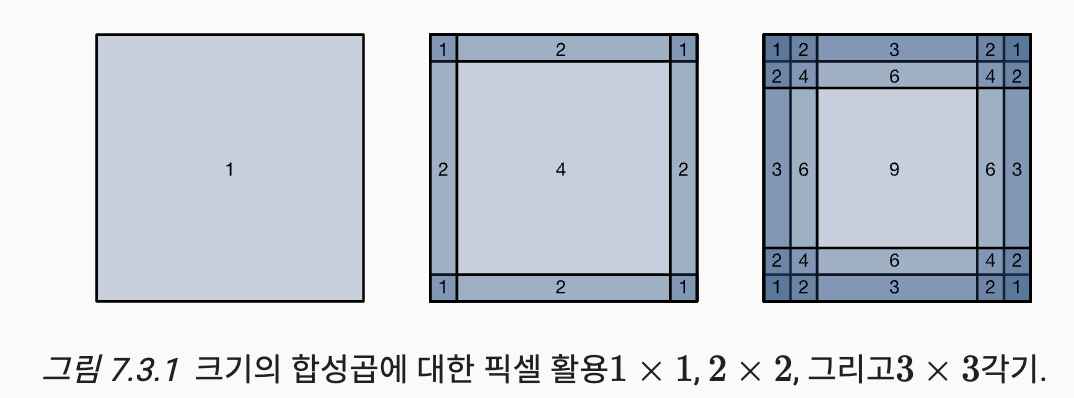

일반적으로 작은 kernel 사용 시 주어진 convolution에 대해 몇개의 픽셀이 손실될 수 있지만, 연속적으로 convolutional layer를 적용함에 따라 누적되는 문제
-> 입력 이미지 경계 주변에 픽셀 추가하여 이미지의 효과적인 크기를 늘릴 수 있음(*zero padding*)

일반적으로 위 아래로 $p_h$개의 행, 왼쪽과 오른쪽에 $p_w$개의 열을 추가하면, 출력 tensor의 크기는 다음과 같음

$$(n_h - k_h + p_h + 1) \times (n_w - k_w + p_w + 1)$$

출력의 높이와 너비가 각각 $p_h$, $p_w$만큼 증가함을 의미


입력과 출력의 높이 및 너비를 동일하게 유지하기 위해  $p_h = k_h - 1 $ 및 $ p_w = k_w - 1 $로 설정 -> 각 레이어의 출력 크기를 쉽게 예측 가능

EX) $k_h$ = 홀수

높이의 양쪽에 $\frac{p_h}{2}$행씩 패딩을 추가 / 너비도 동일한 방식으로 패딩 적용

CNN에서는 주로 \$k_h$와 $k_w$가 1, 3, 5, 7 등 홀수 크기를 갖는 합성곱 커널 사용

홀수 커널을 선택하면, 높이와 너비의 양쪽에 동일한 수의 패딩을 적용할 수 있어 차원을 유지할 수 있는 장점 존재

In [ ]:
# We define a helper function to calculate convolutions.
# It initializes the convolutional layer weights and performs
# corresponding dimensionality
# elevations and reductions on the input and output

def comp_conv2d(conv2d, X):
    # (1, 1) = batch size and the number of channels
    X = X.reshape((1, 1) + X.shape)
    Y = conv2d(X)
    # Strip the first two dimensions: examples and channels
    return Y.reshape(Y.shape[2:])

# 1 row and column is padded on either side,
# so a total of 2 rows or columns are added

conv2d = nn.LazyConv2d(1, kernel_size=3, padding=1)
X = torch.rand(size=(8, 8))
comp_conv2d(conv2d, X).shape

torch.Size([8, 8])

Convolutional kernel 높이와 너비에 대해 다른 padding을 적용하여 output과 input의 높이와 너비를 같게 만들 수 있음

In [ ]:
# We use a convolution kernel with height 5 and width 3.
# The padding on either side of the height and width are 2 and 1, respectively
conv2d = nn.LazyConv2d(1, kernel_size=(5, 3), padding=(2, 1))
comp_conv2d(conv2d, X).shape

torch.Size([8, 8])

### 7.3.2 Stride

cross - correlation 계산할 때, input tensor의 왼쪽 상단 모서리에서 convolution filter를 시작하고, 그 후 filter를 아래, 오른쪽의 위치로 슬라이드

계산 효율성, down sampling을 위해서는 filter의 보폭을 설정하여 중간 위치로 건너 뛰기도 함 (stride가 필요한 이유)

3 by 2 stride를 사용한 cross - correlation
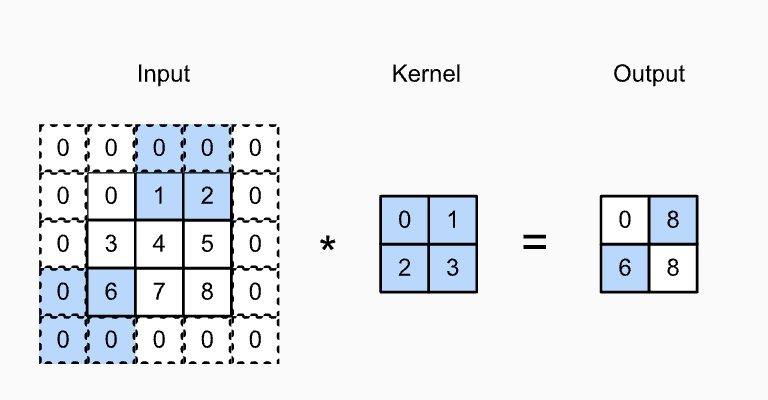


일반적으로, 높이에 대한 스트라이드가 $s_h$, 너비에 대한 스트라이드가 $s_w$일 때 출력의 크기는 다음과 같음:

$$\left\lfloor \frac{n_h - k_h + p_h + s_h}{s_h} \right\rfloor \times \left\lfloor \frac{n_w - k_w + p_w + s_w}{s_w} \right\rfloor$$

만약 $p_h = k_h - 1$, $p_w = k_w - 1$로 설정하면, 출력 크기는 다음과 같이 간단해짐
$$left\lfloor \frac{n_h + s_h - 1}{s_h} \right\rfloor \times \left\lfloor \frac{n_w + s_w - 1}{s_w} \right\rfloor$$

입력 높이와 너비가 각각 스트라이드로 나눠 떨어진다면, 출력 크기는 $
$(n_h/s_h) \times (n_w/s_w)$$


In [ ]:
# height width = 2 -> input width, stride = 2
conv2d = nn.LazyConv2d(1, kernel_size = 3, padding = 1, stride = 2)
comp_conv2d(conv2d, X).shape

torch.Size([4, 4])

In [ ]:
conv2d = nn.LazyConv2d(1, kernel_size=(3, 5), padding=(0, 1), stride=(3, 4))
comp_conv2d(conv2d, X).shape

torch.Size([2, 2])

### 7.3.4 Exercises

Given the final code example in this section with kernel size (3,5) padding (0,1) and stride (3,4) calculate the output shape to check if it is consistent with the experimental result.

4 * 4

## 7.4 Multiple Input and Multiple Output Channels

채널을 mix에 추가하면 input과 hidden expression 3차원 tensor가 됨

In [ ]:
import torch
from d2l import torch as d2l

입력 데이터에 여러 채널이 포함되어 있는 경우 입력 데이터와 cross-valiadation을 수행할 수 있도록 입력 채널 수와 동일한 수의 입력 채널을 가진 convolution kernel을 구성해야함

입력 데이터 채널 수가 $c_i$라면, convolution 채널의 입력 채널 수도 $c_i$여야 함

convolution kernel의 filter 모양이 $k_h * k_w$일 때, $c_i = 1$이면, convolution kernel을 $k_h * k_w$형태의 2차원 tensor로 생각할 수 있음

그러나 $c_i > 1$인 경우, 각 입력 채널마다 $k_h * k_w$ 모양의 tensor를 포함하는 kernel 필요 ($c_i * k_h * k_w$ 형태의 convolutional kernel 생성)

두 개의 입력 채널이 있는 2차원 cross-validation의 예를 제공

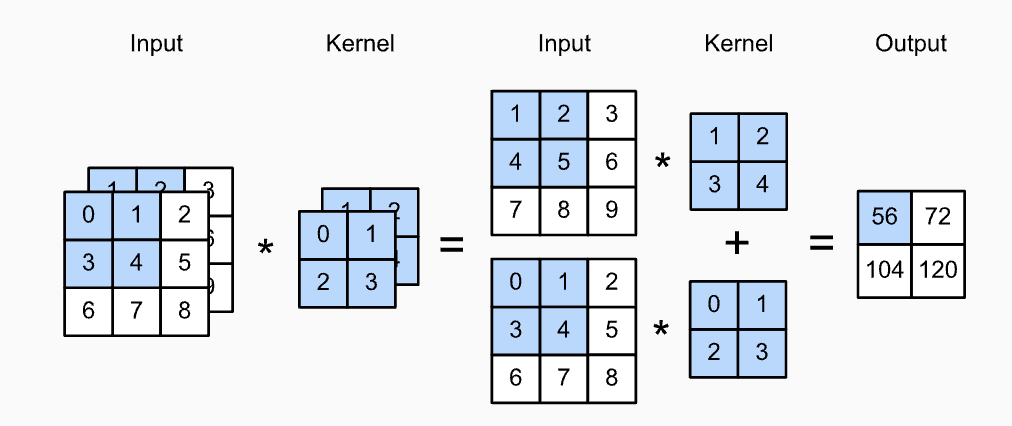



In [ ]:
def corr2d_multi_in(X, K):
    # Iterate through the 0th dimension (channel) of K first, then add them up
    return sum(d2l.corr2d(x, k) for x, k in zip(X, K))

입력 tensor X와 kernel tensor를 구성하여 cross-validation의 출력 검증

In [ ]:
X = torch.tensor([[[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]],
               [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]]])
K = torch.tensor([[[0.0, 1.0], [2.0, 3.0]], [[1.0, 2.0], [3.0, 4.0]]])

corr2d_multi_in(X, K)

tensor([[ 56.,  72.],
        [104., 120.]])

### 7.4.2 Multiple Output Channels

입력 채널 수에 관계없이 항상 하나의 출력 채널로 끝남

신경망이 더 깊어질수록 채널 차원을 늘리며 일반적으로 다운샘플링하여 공간 해상도를 더 큰 채널 깊이로 트레이드 오프

픽셀 또는 채널당 독립적으로 학습된다고 제안 (채널은 공동으로 유용하도록 최적화)

In [ ]:
def corr2d_multi_in_out(X, K):
    # Iterate through the 0th dimension of K, and each time
    # perform cross-correlation operations with input X
    # All of the results are stacked together
    return torch.stack([corr2d_multi_in(X, k) for k in K], 0)

In [ ]:
# construct a trivial convolution kernel with three output channels
# by concatenating the kernel tensor for K with K+1 and K+2

K = torch.stack((K, K + 1, K + 2), 0)
K.shape

torch.Size([3, 2, 2, 2])

X 아래에서 커널 텐서로 입력 tensor에 cross-correlation 수행

 1번째 채널의 결과는 이전 입력 tensor X와 다중 입력 채널, 단일 출력 채널 커널의 결과와 일치

In [ ]:
corr2d_multi_in_out(X, K)

tensor([[[ 56.,  72.],
         [104., 120.]],

        [[ 76., 100.],
         [148., 172.]],

        [[ 96., 128.],
         [192., 224.]]])

### 7.4.3 1 by 1 Convolutional Layer

1 by 1 Convolution 동작

1 by 1 convolution 매우 작은 filter 사용하므로 더 큰 convolution 계층이 adjacent instnace간의 상호작용을 인식할 수 있는(즉 패턴학습 능력) 능력을 잃음

1 by 1 convolution의 유일한 계산 = 채널 차언에서 이루어짐

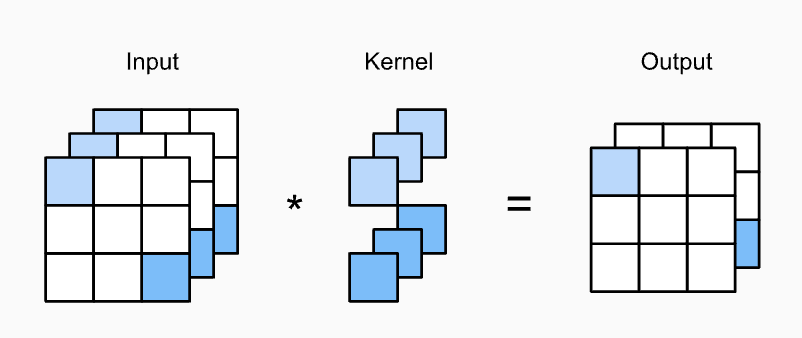

3개의 입력 채널과 2개의 출력 채널의 1 by 1 convolution kernel을 이용한 cross-correlation computation. (입력과 출력은 동일한 너비와 높이를 가짐)

In [ ]:
def corr2d_multi_in_out_1x1(X, K):
    c_i, h, w = X.shape
    c_o = K.shape[0]
    X = X.reshape((c_i, h * w))
    K = K.reshape((c_o, c_i))
    # Matrix multiplication in the fully connected layer
    Y = torch.matmul(K, X)
    return Y.reshape((c_o, h, w))

1 by 1 convolution

In [ ]:
# check with sample data
X = torch.normal(0, 1, (3, 3, 3))
K = torch.normal(0, 1, (2, 3, 1, 1))
Y1 = corr2d_multi_in_out_1x1(X, K)
Y2 = corr2d_multi_in_out(X, K)
assert float(torch.abs(Y1 - Y2).sum()) < 1e-6

- 채널을 통해 CNN은 동시에 여러 feature를 다룰 수 있고, 다양한 입력 데이터에 대해 더 유연한 처리 가능

- 채널은 Locality(이미지의 작은 부분을 분석하는 convolution 특성)와 Translation invariacne(이미지 위치가 변해도 같은 feature를 탐지할 수 있는 능력) 덕분에 파라미터 수를 줄이면서도 복잡하고 다양한 컴퓨터 비전 모델 만드는 데 필요한 표현력 제공

- 하지만 채널 사용은 연산 비용을 증가시킴

- n by n인 이미지를 처리할 때, 커널 크기가 k by k인 convolution의 계산비용 = $O(n^2k^2)$
(입력채널수가 $c_i$이고, 출력채널 수가 $c_0$라면, 연산비용은 O(n62k^2c_ic_0)로 증가)

- 비용 절감을 위해 채널별 연산을 Block Diagonal Structure로 제한 (ResNet과 같은 아키텍쳐에 사용되었고, 이를 통해 계산복잡성을 줄이면서도 성능 유지 가능)

### 7.4.5 Exercises

By what factor does the number of calculations increase if we double both the number of input channels $c_i$ and the number of output channels $c_o$? What happens if we double the padding?

계산량 = 두 채널 수의 곱에 비례

입력 채널과 출력 채널을 2배로 늘리면, 계산량은 4배 증가

padding을 2배로 늘리면, 출력 크기가 커지게 됨. 출력 크기가 커지면 그만큼 더 많은 위치에서 계산 수행해야 하므로 계산량 증가. (But 정확히 2배가 되는 것 = X)

## 7.5 Pooling

최종적으로 네트워크가 답해야 하는 질문 = "이미지에 고양이가 있는가?"와 같이 global problem인 경우 많음 -> 마지막 층 유닛들은 입력 전체에 민감하게 반응할 필요 O

이를 달성하기 위채 정보가 점차적으로 집계되고, 중간처리과정에서 convolution층이 가진 장점을 유지하며 최종적으로 global expression을 학습하게 됨

공간 해상도를 줄이면 네트워크가 깊어질수록 각 숨겨진 노드가 민감하게 반응하는 영역, 즉 receptive field는 입력대비 커지게 되는 과정이 가속화.(convolution kernel이 더 넓은 영역을 효과적으로 커버하게 되기 때문)

edge와 같은 낮은 수준의 특징을 감지할 때, 위치 변화에 대해 불변성을 갖기를 원함.

pooling층은 이러한 문제를 해결하기 위해 convolution층이 위치에 대해 너무 민감하지 안도록 완화시키고, 동시에 공간적으로 표현을 다운샘플링하는 2가지 목적 수행

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

### 7.5.1 Maximum Pooling and Average Pooling

Pooling : Convolution과 마찬가지로 고정된 filter 사용 -> filter를 입력 데이터의 모든 영역에 걸쳐 stride에 따라 이동

각 위치에서 고정된 모양의 pooling filter가 지나갈 때마다 하나의 출력 계산

convolutionㅡ층의 입력과 커널 간의 cross-corelation과 달리, pooling층은 커널X, 아무런 학습 parameter X

대신 pooling filter 내의 요소들의 최댓값 or 평균값 계산 (Max-pooling, Average-pooling)

Pooling = Down sampling과 유사
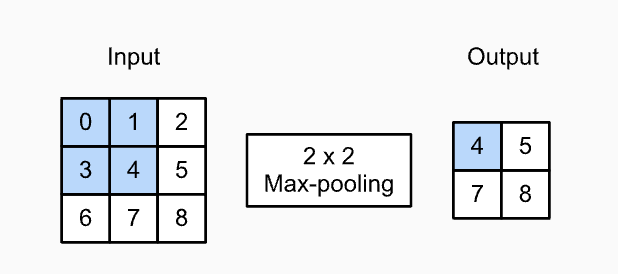

In [ ]:
def pool2d(X, pool_size, mode='max'):
    p_h, p_w = pool_size
    Y = torch.zeros((X.shape[0] - p_h + 1, X.shape[1] - p_w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            if mode == 'max':
                Y[i, j] = X[i: i + p_h, j: j + p_w].max()
            elif mode == 'avg':
                Y[i, j] = X[i: i + p_h, j: j + p_w].mean()
    return Y

In [ ]:
X = torch.tensor([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
pool2d(X, (2, 2))

tensor([[4., 5.],
        [7., 8.]])

### 7.5.2 Padding and Stride

Convolution 계층과 마찬가지로 Pooling 계층은 출력 모양을 변경

입력을 padding하고 stride를 조정하여 원하는 출력 모양을 얻을 수 있도록 작업 조정 가능

딥러닝 프레임워크의 내장된 2d max pooling 계층을 통해 padding과 stride 가능



In [ ]:
# batch size = 1, num of channel = 1,  4 by 4 input tensor
X = torch.arange(16, dtype=torch.float32).reshape((1, 1, 4, 4))
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]]]])

Pooling에서 정보 집계 -> 기본적으로 pooling filter size와 stride 일치시켜야 함

ex) pooling filter = 3 by 3, also stride = 3 by 3

In [ ]:
pool2d = nn.MaxPool2d(3) # 3 = pooling filter size
# Pooling has no model parameters, hence it needs no initialization
pool2d(X) # pooling을 1번만 시행한 결과

tensor([[[[10.]]]])

In [ ]:
# stride & padding 수동으로 지정 가능
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]]]])

In [ ]:
# 임의의 직사각형 pooling filter 지정 가능
pool2d = nn.MaxPool2d((2, 3), stride=(2, 3), padding=(0, 1))
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]]]])

### 7.5.3 Multiple Channels

Multiple channel 입력 데이터를 처리할 때, pooling layer은 각 입력 채널을 별도로 pooling(convolutional layer와 달리 입력 채널을 합산하지 않음)

Pooling layer의 출력 채널 수는 입력 채널 수와 동일하게 유지



In [ ]:
# 2개의 채널이 있는 입력 구성 (X, X + 1)
X = torch.cat((X, X + 1), 1)
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]],

         [[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.],
          [13., 14., 15., 16.]]]])

Pooling 이후에도 출력 채널 수는 여전히 2개

In [ ]:
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]],

         [[ 6.,  8.],
          [14., 16.]]]])

### 7.5.5 Exercises

- Prove that max-pooling cannot be implemented through a convolution alone

- Max - Pooling = pooling filter 안에서 가장 큰 값을 선택하는 비선형적 연산

  Convolution = 커널이 정의한 지역 내에서 입력값들의 linear weighted sum을 계산해 하나의 출력을 내는 선형적 연산

  따라서 선형적 연산인 Convolution만으로는 비선형적 선택인 Pooling을 구현할 수 X

  Max pooling은 filter 내의 하나의 값을 출력하는데, Convolution은 filter 내의 모든 입력값의 가중합의 결과를 출력

  Convolution은 Max pooling처럼 특정 값을 무시하는 방식으로 동작할 수 X

## 7.6 Convolutional Neural Networks (LeNet)

Fully connected layer를 convolution layer로 대체함으로써 훨씬 적은 paramter가 필요한 간결한 모델 사용 가능

LeNet에 대해 다루는 세션

LeNet = backpropagation을 통해 CNN을 성공적으로 훈련

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

### 7.6.1 LeNet

LeNet = 2 부분으로 구성

1. 2개의 convolution layer로 구성된 convolution encoder
2. 3개의 fully connected layer로 구성된 dense block

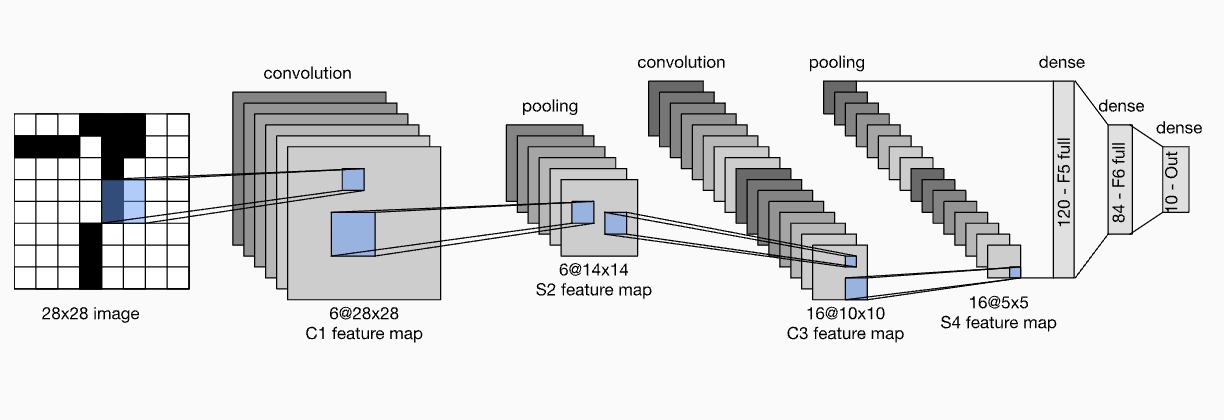

각 convolution 블록의 기본 단위 = convolution 계층, sigmoid activate function, 그리고 그에 따른 average pooling 연산

(ReLU와 max pooling이 더 잘 작동되지만 아직 발견X)

Convolution 블록의 출력을 dense 블록으로 전달하기 위해 mini batch의 각 예제를 평면화
(4차원 입력을 가져와 fully connected layer에서 기대하는 2차원 입력으로 변환)

2차원 표현 = 1번째 차원을 사용하여 Mini batch 예제를 인덱싱하고, 2번째 차원을 사용하여 에제의 평면 벡터 포현 제공

LeNet의 dense 블록에는 각각 120, 84, 10개의 출력을 갖는 3개의 fully connected layer 존재

In [ ]:
def init_cnn(module):
    """Initialize weights for CNNs."""
    if type(module) == nn.Linear or type(module) == nn.Conv2d:
        nn.init.xavier_uniform_(module.weight)

class LeNet(d2l.Classifier):
    """The LeNet-5 model."""
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2), nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120), nn.Sigmoid(),
            nn.LazyLinear(84), nn.Sigmoid(),
            nn.LazyLinear(num_classes))

LeNet의 재현에서 약간 변형을 가한 부분은 gaussian activation layer를 soft max layer로 대체한 것

이러한 변경은 구현을 크게 단순화하며, softmax는 분류 문제에서 확률 분포를 출력하는 데 매우 유용

네트워크 내부에서 이미지가 처리되는 과정을 이해하려면, 단일 채널을 네트워크에 통과시킨 후 각 레이어에서 출력되는 모양을 출력해볼 수 있음
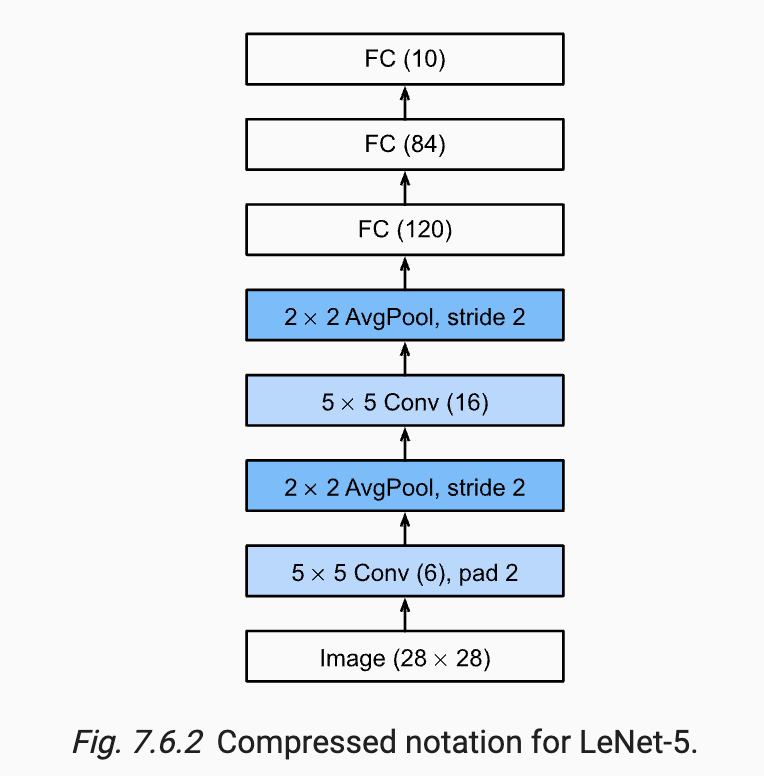

In [ ]:
@d2l.add_to_class(d2l.Classifier)
def layer_summary(self, X_shape):
    X = torch.randn(*X_shape)
    for layer in self.net:
        X = layer(X)
        print(layer.__class__.__name__, 'output shape:\t', X.shape)

model = LeNet()
model.layer_summary((1, 1, 28, 28))

Conv2d output shape:	 torch.Size([1, 6, 28, 28])
Sigmoid output shape:	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape:	 torch.Size([1, 6, 14, 14])
Conv2d output shape:	 torch.Size([1, 16, 10, 10])
Sigmoid output shape:	 torch.Size([1, 16, 10, 10])
AvgPool2d output shape:	 torch.Size([1, 16, 5, 5])
Flatten output shape:	 torch.Size([1, 400])
Linear output shape:	 torch.Size([1, 120])
Sigmoid output shape:	 torch.Size([1, 120])
Linear output shape:	 torch.Size([1, 84])
Sigmoid output shape:	 torch.Size([1, 84])
Linear output shape:	 torch.Size([1, 10])


각 convolution 블록에서 레이어의 높이와 너비는 이전 레이어에 비해 감소

1번쨰 convolution 레이어는 커널 사용으로 인해 발생할 높이와 너비 감소를 보완하기 위해 두 픽셀의 padding 사용

MNIST OCR data set의 이미지 크기는 초기 스캔에서 두 픽셀의 행과 열을 잘라낸 결과 (공간 절약 30% 감소)

2번째 convolution 레이어는 padding을 사용하지 않으므로 높이와 너비가 각각 4픽셀씩 줄어듬

레이어 스택을 거듭하면서 채널 수는 입력의 1에서 1번째 convolution layer 후 6, 2번째 convolution layer 후 16으로 증가

각 pooling layer 높이와 너비를 절반으로 줄임
마지막으로, fully connected layer는 차원을 줄여 최종적으로 클래스 수와 일치하는 출력 차원을 내보냄

### 7.6.2 Training

LeNet-5 모델이 Fashion-MNIST 데이터셋에서 어떻게 성능을 발휘하는지 실험

CNN은 더 적은 매개변수를 가지지만, 비슷한 깊이의 다층 퍼셉트론(MLP)에 비해 계산 비용이 더 클 수 있음 (매개변수가 훨씬 더 많은 곱셈에 참여하기 때문)

GPU를 사용할 수 있다면, 훈련 속도를 높이기 위해 활용 가능

d2l.Trainer : 모든 세부 사항을 자동으로 처리
(사용가능한 장치에서 모델 매개변수를 초기화)
MLP와 마찬가지로, 손실 함수는 cross-entropy를 사용하며, mini batch stochastic gradient descent method를 통해 이를 최소화

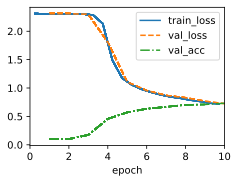

In [ ]:
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = LeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)

### 7.6.4 Exercises

- What happens to the activations when you feed significantly different images into the network (e.g., cats, cars, or even random noise)?

- 서로 매우 다른 이미지를 네트워크에 입력하면, 활성화 값에도 큰 차이 발생

- CNN은 학습된 패턴을 기반으로 입력 이미지를 처리하므로, Fashion-MNIST와 같은 특정 도메인에 맞춰 학습된 모델은 다른 도메인의 이미지에 대해 적절하게 활성화되지 않을 수 잇음

- 네트워크는 학습하지 않은 새로운 데이터에 대해 예측력이 떨어지며, 이는 모델의 일반화 능력의 한계를 보여줌

## 8.2 Networks Using Blocks (VGG)

AlexNet은 딥한 CNN이 좋은 성능을 낼 수 있다는 실증적 증거를 제공

이후 몇가지 휴리스틱 개념들이 deep network 설계에 자주 사용

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

### 8.2.1 VGG Blocks

CNN의 기본 구성 요소는 다음과 같은 순서로 이루어짐

1. 해상도 유지하기 위해 padding을 사용하는 convolution layer
2. ReLu와 같은 non-linear activation function
3. 해상도를 줄이기 위한 max-pooling과 같은 pooling layer

문제점 : 공간 해상도가 매우 빠르게 감소
네트워크의 합성곱 레이어 수에 한계를 두며, 모든 차원이 소모되기 전에 일정한 개수 이상의 layer 쌓을 수 X

ex) ImageNet과 같은 경우에는 이러한 방식으로 8개 이상의 convolution layer를 사용하는 것이 불가능

VGG로 돌아가서, VGG block은 1의 padding을 사용한 3 by 3 convolution과 2 stride를 가지며 높이와 너비를 절반으로 줄이는 max-pooling layer의 시퀸스로 구성

In [ ]:
def vgg_block(num_convs, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.LazyConv2d(out_channels, kernel_size=3, padding=1))
        layers.append(nn.ReLU())
    layers.append(nn.MaxPool2d(kernel_size=2,stride=2))
    return nn.Sequential(*layers)

AlexNet과 LeNet처럼 VGG 네트워크는 두 부분으로 나눌 수 있음

- 1번째 부분 : 주로 convolution과 pooling layer로 구성
- 2번째 부분 : AlexNet과 동일한 fully-connected layer로 구성

주요 차이점은 VGG에서는 convolution layer들이 non-linear transformation으로 그룹화되어 차원을 유지한 뒤, 해상도를 줄이는 단계가 뒤따름

AlexNet에서는 모든 레이어가 개별적으로 설계된 반면, VGG 여러 레이어가 블록 형태로 구성된 것이 핵심 차이점

네트워크의 convolution 부분은 여러 VGG 블록을 순차적으로 연결하여 구성

arch라는 변수는 각 블록을 나타내는 튜플 리스트로 구성되어 잇으며, 각각의 튜플은 2개의 값 포함

이 값들은 합성곱 레이어의 개수와 출력 채널 수를 나타내며, vgg_block 함수를 호출하는 데 필요한 인자

VGG는 단일 네트워크가 아닌 네트워크의 가족을 정의하며, 특정 네트워크 구축을 위해서는 arch를 순회하며 블록 구성

VGG는 AlexNet과는 달리, 레이어들을 그룹화하여 차원을 유지하며 복잡한 연산을 가능하게 하며, 이러한 특징이 딥러닝 연구에서 중요한 진보로 작용
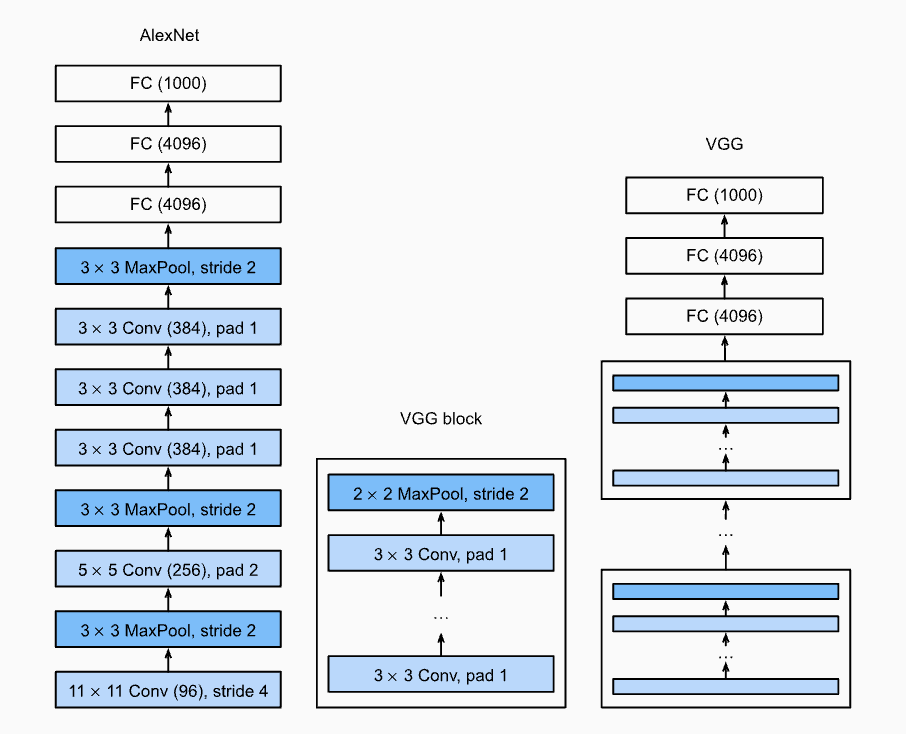

In [ ]:
class VGG(d2l.Classifier):
    def __init__(self, arch, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        conv_blks = []
        for (num_convs, out_channels) in arch:
            conv_blks.append(vgg_block(num_convs, out_channels))
        self.net = nn.Sequential(
            *conv_blks, nn.Flatten(),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
            nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

VGG 네트워크는 5개의 convolution block으로 구성

첫 두 블록 = 1개의 convolution layer

나머지 3개의 블록 = 2개의 convolution layer 포함

1번째 블록 = 64개의 출력 채널을 가지며, 이후 각 블록은 출력 채널 수를 2배로 늘려 최종적으로 512개에 도달

8개의 합성곱 레이어와 3개의 fully connected layer를 사용하기 때문에 VGG-11라고 부름

In [ ]:
VGG(arch=((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))).layer_summary(
    (1, 1, 224, 224))

Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


각 블록에서 높이와 너비가 절반으로 줄어들며, 마지막에는 높이와 너비가 7에 도달

그 후 표현을 평탄화하여 네트워크의 fully connected layer에서 처리 가능

### 8.2.3 Training

VGG - 11은 AlexNet보다 계산적으로 더 복잡하므로, 우리는 채널 수를 줄인 네트워크를 구성 (Fashion-MNIST에서 훈련하기 충분)

AlexNet 훈련과정과 유사

검증 손실과 훈련 손실이 거의 일치하는 것을 보면, 과적합이 거의 발생하지 않았음을 알 수 있음


In [ ]:
model = VGG(arch=((1, 16), (1, 32), (2, 64), (2, 128), (2, 128)), lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

100%|██████████| 26421880/26421880 [00:01<00:00, 16553717.87it/s]


Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 305399.43it/s]


Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5463252.99it/s]


Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 12860200.71it/s]

Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw




/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


### 8.2.4 Exercises

- When displaying the dimensions associated with the various layers of the network, we only see the information associated with eight blocks (plus some auxiliary transforms), even though the network has 11 layers. Where did the remaining three layers go?

- VGG-11 network의 11개 레이어 중에서 8개의 블록과 몇가지 변환과 관련된 정보만 표시되며, 나머지 3개의 레이어는 fully connected layerdp goekd
  
  즉 초기 8개 레이어는 주로 convolution과 pooling layer로 구성되어 있으며, 마지막 3개의 레이어는 flattening 출력값을 처리하는 fully connected layer이다

  따라서 네트워크의 나머지 3개 레이어는 이러한 fully connected layer로 처리되어, 최종적으로 분류 결과를 도출하는 데 사용

## 8.6 Residual Networks (ResNet) and ResNeXt

더 깊은 네트워크를 설계함에 따라, 레이어를 추가하는 것이 네트워크의 복잡성과 표현력을 어떻게 증가시키는지 이해하는 것이 중요

레이어를 추가할 때 단순히 네트워크를 다르게 만드는 것이 아니라, 네트워크가 더 표현력이 뛰어나도록 설계하는 능력이 필요

수학적으로 네트워크의 레이어를 추가하면 네트워크가 더 복잡한 패턴을 학습할 수 있는 가능성이 커지며, 다양한 데이터 패턴을 더욱 정확하게 표현

깊은 네트워크는 얕은 네트워크에 비해 더 강력한 표현력을 가질 수 있게 됨



In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

### 8.6.1 Function Classes



특정 네트워크 아키텍처가 도달할 수 있는 함수의 클래스 F를 고려해보자

여기서 f는 우리가 찾고자 하는 함수이며, F 내에서 최선의 선택인 $f*_F$를 찾으려고 시도

정규화는 함수 클래스 F의 복잡성을 제어하고, 일관성을 달성하는 데 도움을 주며, 더 큰 학습 데이터는 일반적으로 더 나은 $f*_F$로 이어짐

더 강력한 아키텍처 F를 설계하면 더 나은 결과 얻을 수 있다고 기대할 수 있으나, 반드시 그렇다고 보장할 수 X

중첩된 함수 클래스를 사용하면 비중첩 함수 클래스에서 발생하는 문제 피할 수 있음
$$f^*_F = argmin_f L(X, y, f)$$

ResNet에 대한 아이디어는, 추가된 각 층이 신경망에 있는 하나의 원소로서 항등함수를 더 쉽게 포함해야 한다는 개념에 기초

그 결과 Residual block이라는 간단하지만 강력한 해결책을 제안

Residual network는 deep neural network를 설계하는 방식에 큰 영향을 미쳤으며, 이 후 다양한 분야에 적용


### 8.6.2 Residual Blocks

먼저 입력을 x로 하고, 우리가 학습을 통해 얻고자 하는 목표 mapping을 H(x)라고 가정

왼쪽 그림에서 점선으로 표시된 부분이 직접적으로 H(x)를 학습

오른쪽 그림에서 점선 안의 부분이 잔차 매핑 F(x) = H(x) - x를 학습해야 하는데, 이것이 Residual block이란 이름이 붙은 이유

만약 목표 매핑이 항등함수 H(x) = x라면, 잔차 매핑은 F(x) = 0이 되므로 학습이 더 쉬워짐

즉 점선 안의 가중치와 편향을 모두 0으로 만들면 됨

오른쪽 그림은 ResNet의 Residual block을 보여주며, 계층의 입력 x를 덧셈 연산자로 직접 전달하는 실선이 residual connection이라 부름

Residual block을 사용하면 입력이 여러 계층을 빠르게 통과 가능

실제로 Residual block 여러 경로를 가지는 inception 블록의 특수한 case

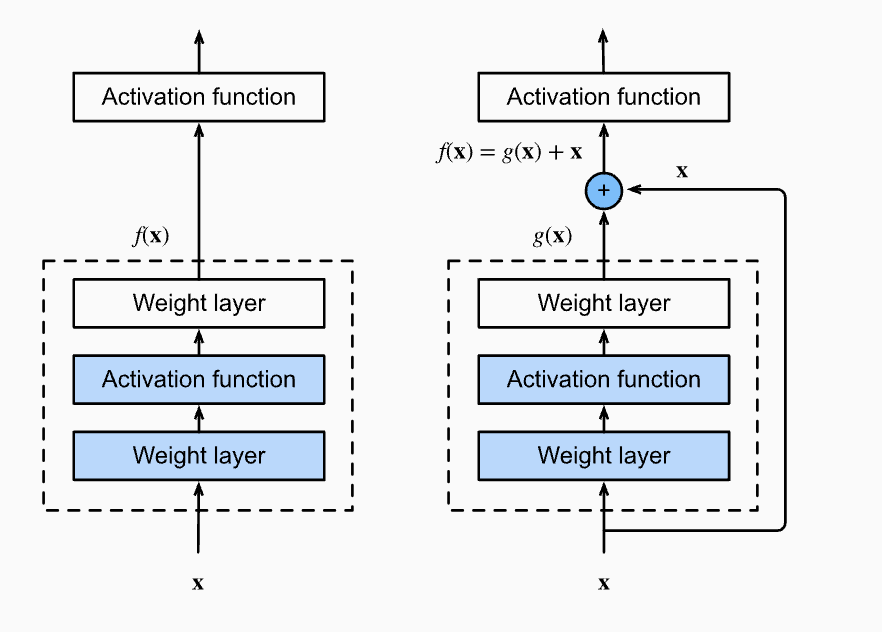

ResNet은 VGG의 fully convolution layer 디자인을 기반으로 하며, residual block은 2개의 convolution layer로 구성

두 층은 동일한 출력 채널 수를 가지며, 각각의 convolutional alyer 뒤에는 batch normalization layer와 ReLU activation function 존재

2개의 convolution 연산을 건너 뛰고 입력을 최종 ReLU activation function에 더해주는 방식으로 진행

두 개의 convolution 출력이 입력과 동일한 형태를 지녀야하므로, 두 값을 더해줄 수 O

출력 채널을 변경하고자 할 경우, 입력 형태를 원하는 형태로 변환하기 위해 추가적인 convolution layer 도입해야함

In [ ]:
class Residual(nn.Module):
    """The Residual block of ResNet models."""
    def __init__(self, num_channels, use_1x1conv=False, strides=1):
        super().__init__()
        self.conv1 = nn.LazyConv2d(num_channels, kernel_size=3, padding=1,
                                   stride=strides)
        self.conv2 = nn.LazyConv2d(num_channels, kernel_size=3, padding=1)
        if use_1x1conv:
            self.conv3 = nn.LazyConv2d(num_channels, kernel_size=1,
                                       stride=strides)
        else:
            self.conv3 = None
        self.bn1 = nn.LazyBatchNorm2d()
        self.bn2 = nn.LazyBatchNorm2d()

    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = self.bn2(self.conv2(Y))
        if self.conv3:
            X = self.conv3(X)
        Y += X
        return F.relu(Y)

이 코드는 2가지 유형의 네트워크 생성

- 1번째 유형 : use_1x1conv = False일 때, 입력을 출력에 더한 후 ReLU의 비선형성 적용

- 2번째 유형 : 채널 수와 해상도를 맞추기 위해 추가적인 convolution 연산 사용 후 더하는 방식
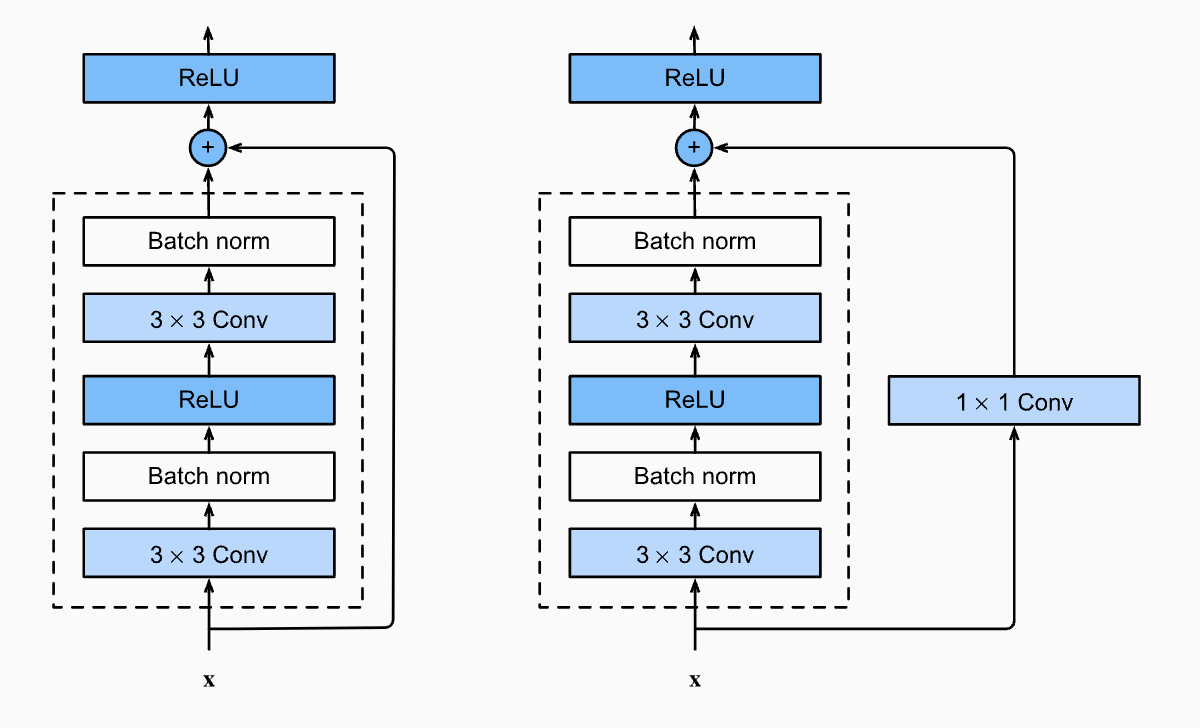



입력과 출력이 동일한 모양이라 1 by 1 convolution이 필요하지 않은 경우를 살펴보자


In [ ]:
blk = Residual(3)
X = torch.randn(4, 3, 6, 6)
blk(X).shape

torch.Size([4, 3, 6, 6])

출력의 높이와 너비를 절반으로 줄이면서 출력 채널 수를 늘리는 옵션도 존재

이 경우 use_1x1conv = True를 통해 1 by 1 convolution 사용

이는 각 ResNet 블록의 시작부분에서 stride = 2를 통해 공간적 차원을 줄일 때 유용

In [ ]:
blk = Residual(6, use_1x1conv=True, strides=2)
blk(X).shape

torch.Size([4, 6, 3, 3])

### 8.6.3 ResNet Model

ResNet의 첫 2개 층은 이전의 GoogLeNet과 동일

64개의 출력 채널을 가진 convolution layer와 stride = 2인 max pooling layer가 순서대로 적용

차이점 = ResNet에서는 각 convolution layer 뒤에 batch normalization layer 추가

In [ ]:
class ResNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

GoogLeNet은 Inception블록으로 구성된 4개의 모듈을 사용하지만, ResNet은 Residual 블록으로 구성된 4개의 모듈 사용

각 모듈은 동일한 출력 채널을 갖는 여러개의 Residual block으로 구성

1번째 모듈의 채널 수는 입력 채널과 동일

이미 stride = 2인 max pooling layer 사용했으므로 높이, 너비를 줄일 필요 X

이후 각 모듈의 1번째 residual block에서 채널 수는 이전 모듈의 2배로 증가, 높이와 너비는 절반으로 감소

In [ ]:
@d2l.add_to_class(ResNet)
def block(self, num_residuals, num_channels, first_block=False):
    blk = []
    for i in range(num_residuals):
        if i == 0 and not first_block:
            blk.append(Residual(num_channels, use_1x1conv=True, strides=2))
        else:
            blk.append(Residual(num_channels))
    return nn.Sequential(*blk)


그 후 ResNet에 모든 모듈 추가 (각 모듈에 2개의 Residual block 사용)

마지막으로 global average pooling layer와 fully connected layer이 출력으로 추가

In [ ]:
# Initializing code for ResNet
@d2l.add_to_class(ResNet)
def __init__(self, arch, lr=0.1, num_classes=10):
    super(ResNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.b1())
    for i, b in enumerate(arch):
        self.net.add_module(f'b{i+2}', self.block(*b, first_block=(i==0)))
    self.net.add_module('last', nn.Sequential(
        nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
        nn.LazyLinear(num_classes)))
    self.net.apply(d2l.init_cnn)


각 모듈에는 4개의 convolution layer 존재, 1번째 convolution layer와 마지막 fully connected layer를 포함해 총 18개의 층 존재

ResNet의 주된 아키텍처는 GoogLeNet과 유사하지만, 구조가 더 단순하고 수정하기 쉬워 널리 사용

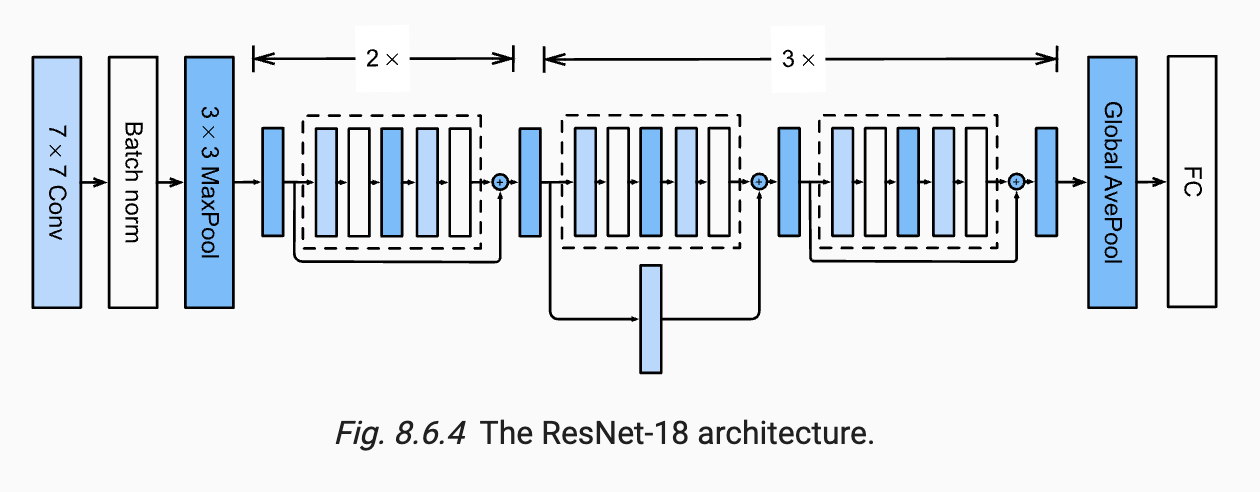

ResNet 학습 전에 ResNet의 각 모듈을 거치며 입력의 형태가 어떻게 변하는지 살펴보자

해상도는 점점 줄어드는 반면, 채널 수는 계속 증가

In [ ]:
class ResNet18(ResNet):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__(((2, 64), (2, 128), (2, 256), (2, 512)),
                       lr, num_classes)

ResNet18().layer_summary((1, 1, 96, 96))

Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 128, 12, 12])
Sequential output shape:	 torch.Size([1, 256, 6, 6])
Sequential output shape:	 torch.Size([1, 512, 3, 3])
Sequential output shape:	 torch.Size([1, 10])


### 8.6.4 Training

ResNet을 Fashion-MNIST 데이터셋에서 학습

학습 및 검증 손실을 나타내는 그래프를 보면, 학습 손실이 훨씬 낮은 것을 알 수 있음

-> 이러한 유연성을 가진 네트워크에서는 더 많은 학습 데이터가 차이를 줄이고 정확도를 높이는 데 확실한 이점 제공

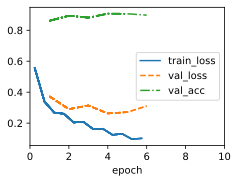

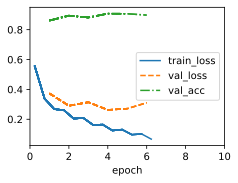

In [ ]:
model = ResNet18(lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)